---

## (modified) Solow model

This model tries to explain long-term productivity, its relation to productivity and the speed of convergence.

The setup is the following:

- a country accumulates capital $k_t$
- population $n_t$ grows at rate $g$ (so that $n_{t+1}=g n_t$)
- capital and labour are combined to produce $y_t = A F(k_t, n_t)$ where $A>0$ is total factor productivity.
- capital depreciates at rate $\delta \in ]0,1[$. Its law of motion is $k_{t+1}=(1-\delta)k_{t}+i_{t}$ where $i_t$ is the amount invested at time $t$
- production is either consumed or invested: $y_t = c_t + i_t$

We choose a Cobb-Douglas specification with constant returns to scale $F(k_t, n_t) = k_t^{\alpha} n_t^{1-\alpha}$.

In the Ramsey–Cass–Koopmans  model (also called neoclassical growth model), a representative agent would choose $c_t$ in every period so as to maximize an intertemporal utility like $\sum_{t \geq 0} \beta^t U(c_t)$ where $\beta \in [0,1[$ is a time discount and $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ is the instantaneous felicity.

Here we follow the Solow-Swan specification and assume instead there is a fixed fraction $s\in[0,1[$ of income in every period, which is saved and invested in every period. In other words investment (or savings) is given by:

$$i_t = s y_t$$

As a result, the dynamic of capital and all other variables will be backward looking and can be simulated easily.

__Calibrate parameters $\beta$, $\delta$ and $g$, that is, propose plausible values for them, from the litterature, or by matching some observable fact.__

We set $\alpha = 0.3$, which we take from historical data.

For the interest rate $i$, I propose a value of $4\%$, which is a common example used in the literature. Then, we have $\beta = \frac{1}{1 + i} = 0.96$.

Here, we use $s = 0.2$.

We can use a value of $10\%$ for $\delta$, since this is also a commonly used figure.

Finally, we set $g = 101\%$, the current global propulation growth.

__Detrend the equations of the model w.r.t. population growth. Denote the detrended variables with a hat (in the code we assume all variables are detrended and ignore the hat).__

The capital rate is the partial derivative of production wrt capital. Multiplying this gives us the capital income $rK = \alpha y$.

Similarly, labor income is given by $w L = (1- \alpha) y$.

We detrend the equations and obtain the following:
$$
\hat{k}_t = \frac{(1 - \delta) k_{t - 1} + i_{t - 1}}{g}
$$
$$
\hat{y}_t = k_t^\alpha
$$
$$
\hat{y}_t = c_t + i_t
$$
$$
\hat{i}_t = s y_t
$$

Our goal is to compute the steady-state and assess its stability.

__Compute a function `f` which returns the capital $\hat{k}_{t+1}$ as a function of $\hat{k_t}$. It is suggested to define `f(k::Float64, p::Dict{Symbol, Float64})` where `p` is a dictionary of parameters.__

 (note: such a dictionary can be defined as `p = Dict(:a=>0.9, :b=>4)` and accessed with brackets `p[:a]` or `p[:b]`) (note2: symbols like `:a` or `:b` are lightweight string. The content must be a valid julia identifier so that it is valid to write `a=p[:a]`)

In [1]:
p = Dict(
    :α=>0.3,
    :β=>0.96,
    :δ=>0.1,
    :g=>1.01,
    :s=>0.2
)

Dict{Symbol, Float64} with 5 entries:
  :α => 0.3
  :s => 0.2
  :δ => 0.1
  :g => 1.01
  :β => 0.96

In [2]:
function f(k0, p::Dict{Symbol, Float64})
    y0 = k0^p[:α]
    i0 = p[:s]*y0
    k1 = (k0*(1 - p[:δ]) + i0) / (p[:g])
    return k1
end

f (generic function with 1 method)

In [3]:
f(10, p)

9.3059925376176

__Starting from an initial level $\hat{k}_0$ compute successive iterates of `f` to find the long-run level $\overline{k}$ of capital per capita. (Bonus: produce a nice plot of the convergence)__

In [4]:
function recursive_steps(fun, x0, args...; N=100)
    values = Float64[x0]
    for n=1:N
        x0 = values[end]
        x1 = fun(x0, args...)
        push!(values, x1)
    end
    return values
end

recursive_steps (generic function with 1 method)

In [5]:
simulations = recursive_steps(f, 0.5, p)

101-element Vector{Float64}:
 0.5
 0.6063866131398485
 0.7107695855269803
 0.812101308038866
 0.9096883570997635
 1.0030893113343788
 1.0920450879310866
 1.176429808153857
 1.2562152493282885
 1.3314446313777966
 ⋮
 2.3476131685985817
 2.347730195704665
 2.3478383026256426
 2.3479381691683163
 2.348030423348851
 2.348115645335857
 2.3481943710936406
 2.348267095748365
 2.348334276698156

In [6]:
import Pkg; Pkg.add("Plots")

using Plots

    Updating registry at `C:\Users\tress\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`


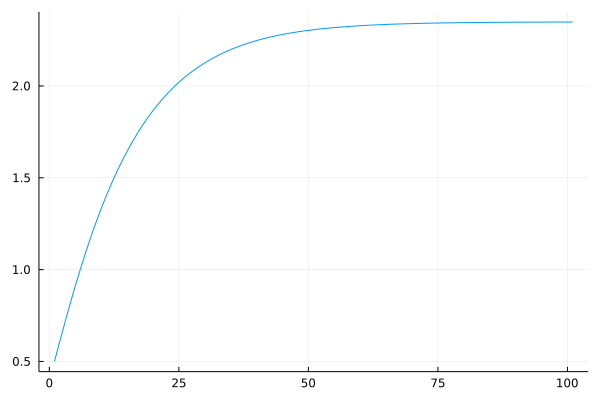

In [14]:
pl = plot()
plot!(pl, simulations, label = "")

__What factors affect the steady-state level of capital?__

At the steady-state, we have:
$$
k\left(1 - \frac{1 - \delta}{g}\right) = \frac{i}{g} \iff i = (g - 1 + \delta)k = s k^\alpha
$$

Hence, the steady-state level of capita rises with $\alpha$ and $s$ and decreases with $g$.

__Study the stability of $f$ around $\overline{k}$. Which factors affect the speed of convergence towards the steady-state?__

In [10]:
function steady_state(fun, p)
    sim = recursive_steps(fun, 1.0, p)
    return sim[end]
end

steady_state (generic function with 1 method)

In [11]:
steady_state(f, p)

2.348599266557238

To study the stability, we have to look at the derivative of $f$ as a unction of $k$. If it is between 0 and 1, the point is a stable equilibrium. If it is over 1, it is unstable.

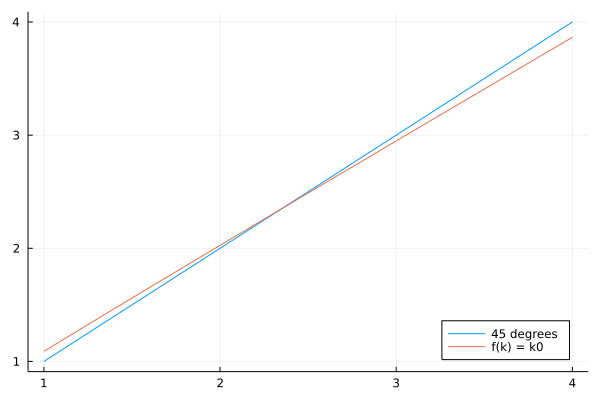

In [19]:
kvec = range(1, 4; length=100);
fvec = [f(k, p) for k in kvec];
pl = Plots.plot(legend=:bottomright)
plot!(pl, kvec, kvec, label="45 degrees")
plot!(pl, kvec, fvec, label="f(k) = k0")

In [24]:
function df(k0, p::Dict{Symbol, Float64})
    dy0 = p[:α]*k0^(p[:α] - 1)
    di0 = p[:s]*dy0
    dk1 = ((1 - p[:δ]) + di0) / (p[:g])
    return dk1
end

df (generic function with 1 method)

In [28]:
kbar = steady_state(f, p);
df(kbar, p)

0.923767723171523

It therefore seems that the equilibrium is a stable one.

__Compute the steady-state directly using a Newton method and compare convergence speed.__

In [30]:
import Pkg; Pkg.add("Roots")

using Roots

   Resolving package versions...
   Installed CommonSolve ────── v0.2.0
   Installed ConstructionBase ─ v1.3.0
   Installed Setfield ───────── v0.8.2
   Installed Roots ──────────── v2.0.0
    Updating `C:\Users\tress\.julia\environments\v1.7\Project.toml`
  [f2b01f46] + Roots v2.0.0
    Updating `C:\Users\tress\.julia\environments\v1.7\Manifest.toml`
  [38540f10] + CommonSolve v0.2.0
  [187b0558] + ConstructionBase v1.3.0
  [f2b01f46] + Roots v2.0.0
  [efcf1570] + Setfield v0.8.2
  [9fa8497b] + Future
Precompiling project...
  ✓ CommonSolve
  ✓ ConstructionBase
  ✓ Setfield
  ✓ Roots
  4 dependencies successfully precompiled in 11 seconds (128 already precompiled)


In [37]:
function f_root(k0)
    p = Dict(
    :α=>0.3,
    :β=>0.96,
    :δ=>0.1,
    :g=>1.01,
    :s=>0.2
    )
    y0 = k0^p[:α]
    i0 = p[:s]*y0
    k1 = (k0*(1 - p[:δ]) + i0) / (p[:g])
    return k1 - k0
end

f_root (generic function with 1 method)

In [38]:
find_zero(f_root, 2.4)

2.349148350013764

__Suppose one tries to maximize steady-state consumption by choosing saving rate $s$. Which value would one choose?__

__(Bonus) Suppose an agent is given the intertemporal utility from the Ramsey–Cass–Koopmans model but chooses saving rate once for all. Which saving rate would one choose? Is it the same for all initial levels of capital?__

